# 1.3.1

In [74]:
import numpy as np
import numpy.random as rnd
import numpy.linalg as lin

points = []
for i in range(0,4):
    points.append(rnd.uniform(0,10,size=(3,)))
    
print(lin.norm(points[1]-points[0])) # Евклидово
print(lin.norm(points[1]-points[0]) ** 2) # Квадрат евклидово
print(lin.norm(points[1]-points[0],ord=np.inf)) # Чебишев
print(lin.norm(points[1]-points[0],ord=1)) # Хемминг

4.52553944034914
20.480507226155602
3.323831497963518
7.621640574937633


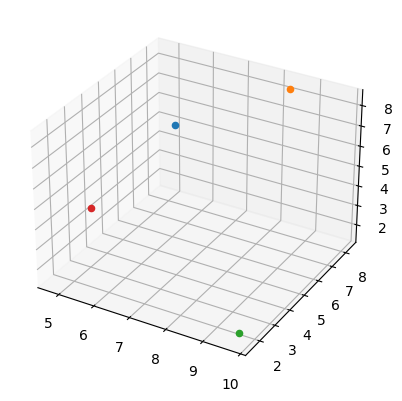

In [75]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")

for p in points:
    ax.scatter(p[0],p[2],p[2])
    
plt.show()

# 1.3.2

In [76]:
Z = np.zeros((5,5))
Z += np.arange(5)
Z

array([[0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.]])

# 2.3.1

In [21]:
import piplite as pl
await pl.install('seaborn')

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

iris = pd.read_csv("iris.csv")
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


k = 1 , accuracy:  87.0 %
k = 5 , accuracy:  87.0 %
k = 10 , accuracy:  91.0 %


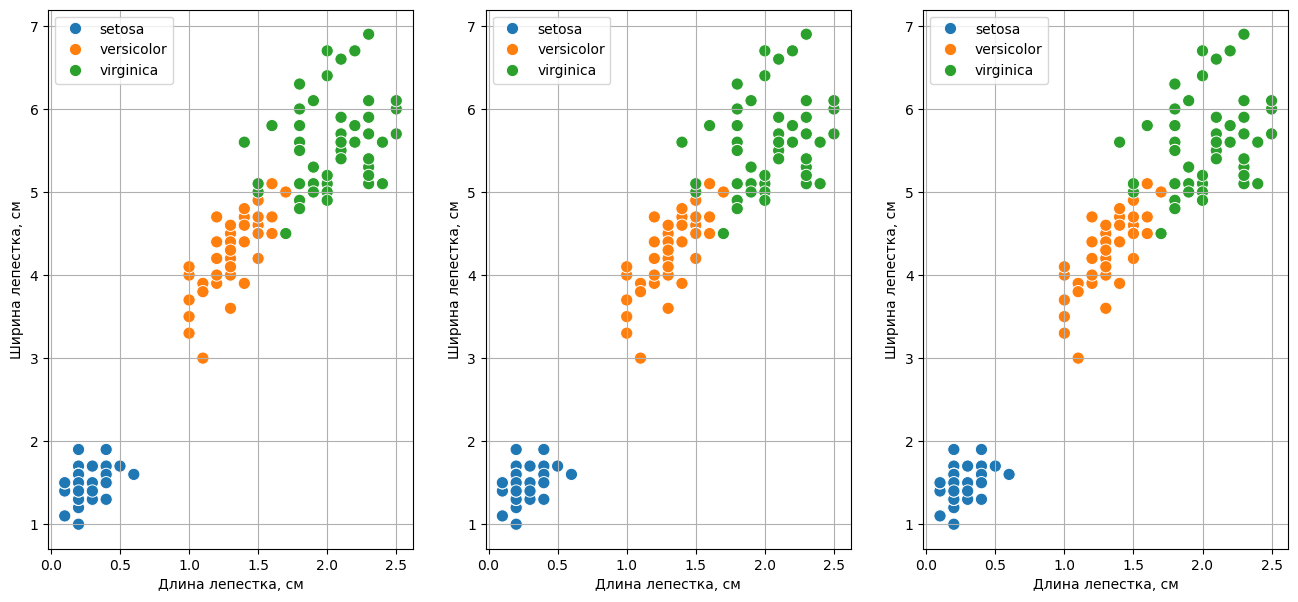

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15
)

plt.figure(figsize=(16, 7))

for i,n in enumerate([1,5,10]):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("k =",n,", accuracy: ",np.round(accuracy_score(y_test,y_pred)*100),"%")

    plt.subplot(1,3,i+1)

    sns.scatterplot(
        data=iris,
        x="petal_width_cm", y="petal_length_cm",
        hue="species",
        s=78
    )

    plt.xlabel("Длина лепестка, см")

    plt.ylabel("Ширина лепестка, см")

    plt.legend()

    plt.grid()

Набор данных оказался очень удобный для кластеризации, поэтому не смотря на кол-во соседей (1, 5, 10) кластеры получаются одинаково удачными!

# 3.3.2

In [78]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{"Цвет волос" : 2, "Рост" : 2, "Цвет глаз" : 1},
            {"Цвет волос" : 1, "Вес" : 1, "Цвет глаз" : 3},
            {"Цвет волос" : 2, "Вес" : 3, "Цвет глаз" : 2},
            {"Цвет волос" : 3, "Рост" : 1, "Цвет глаз" : 3}]

dictvectorizer = DictVectorizer(sparse=False)

features = dictvectorizer.fit_transform(data_dict)
features

array([[0., 2., 2., 1.],
       [1., 0., 1., 3.],
       [3., 0., 2., 2.],
       [0., 1., 3., 3.]])